In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
import pickle

In [2]:
df=pd.read_csv('final.csv')
df.columns=["Date","Consumption"]
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [3]:
model=sm.tsa.statespace.SARIMAX(df['Consumption'],order=(3, 1, 3),seasonal_order=(3,1,3,12))
results=model.fit()
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


C:\Users\Siddhi Mankani\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Siddhi Mankani\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Siddhi Mankani\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Consumption,forecast
Date,,
2020-08-01,125.4,120.329529
2020-09-01,115.8,117.675761
2020-10-01,130.4,134.746556
2020-11-01,140.5,114.368520
2020-12-01,137.6,105.108745


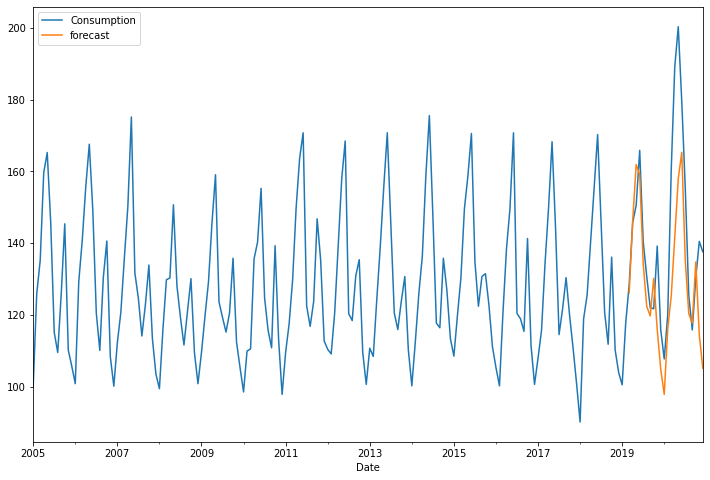

In [4]:
df['forecast']=results.predict(start=170,end=191,dynamic=True)
df[['Consumption','forecast']].plot(figsize=(12,8))
df.tail()
# x=df['Date'].to_list()
# print(x)

,Consumption,forecast
2005-01-01,100.1,NaN
2005-02-01,125.8,NaN
2005-03-01,135.2,NaN
2005-04-01,159.6,NaN
2005-05-01,165.3,NaN
2005-06-01,145.7,NaN
2005-07-01,115.1,NaN
2005-08-01,109.5,NaN
2005-09-01,125.9,NaN
2005-10-01,145.4,NaN


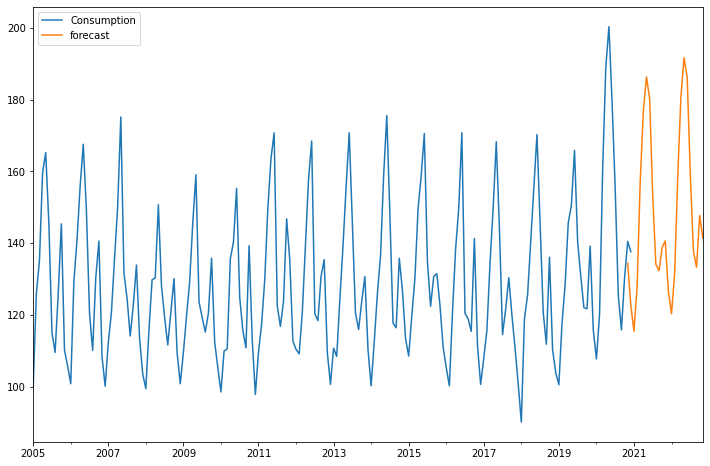

In [4]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 190, end = 260, dynamic= True)  
future_df[['Consumption', 'forecast']].plot(figsize=(12, 8))
future_df.head(n=10)

In [5]:
new_df=pd.DataFrame(index=future_df.index)
new_df['Forecast'] = future_df['forecast']
new_df=new_df.iloc[192:]
#new_df.tail(5)
#new_df['Forecast'].plot(figsize=(12, 8)) 
d = new_df.to_dict()
# print the dictionary
print(d)

{'Forecast': {Timestamp('2021-01-01 00:00:00'): 115.41996773845754, Timestamp('2021-02-01 00:00:00'): 127.68758295851305, Timestamp('2021-03-01 00:00:00'): 157.22613717198305, Timestamp('2021-04-01 00:00:00'): 176.8545225597452, Timestamp('2021-05-01 00:00:00'): 186.39037353881085, Timestamp('2021-06-01 00:00:00'): 180.36290191039188, Timestamp('2021-07-01 00:00:00'): 153.08385444265025, Timestamp('2021-08-01 00:00:00'): 134.117678849827, Timestamp('2021-09-01 00:00:00'): 132.3112203264156, Timestamp('2021-10-01 00:00:00'): 138.7636576871854, Timestamp('2021-11-01 00:00:00'): 140.63906506237402, Timestamp('2021-12-01 00:00:00'): 126.54479458786693, Timestamp('2022-01-01 00:00:00'): 120.31081246706246, Timestamp('2022-02-01 00:00:00'): 131.51476305233405, Timestamp('2022-03-01 00:00:00'): 158.71414127898578, Timestamp('2022-04-01 00:00:00'): 180.7954259343977, Timestamp('2022-05-01 00:00:00'): 191.7255708689212, Timestamp('2022-06-01 00:00:00'): 186.40238234607529, Timestamp('2022-07-01

In [ ]:
results.save('predict.pkl')

In [ ]:
print(d)